In [2]:
from DataLoader import load_data
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import re
import ast

In [1]:
from tensorflow.keras.models import load_model

# Load the models
vgg = load_model('AugmentationBaseModel')
resnet = load_model('ResnetModel')
mobilenet = load_model('MobileNetModel')



In [3]:
df = pd.read_csv('test_dataset')
def clean_bbox(bbox_str):
    clean_str = re.sub(r'[^\d,.]', '', bbox_str)
    bbox = tuple(map(float, clean_str.split(',')))
    return bbox

df['bbox'] = df['bbox'].apply(clean_bbox)

masked_images, images, masks, labels = load_data(df)
labels = labels - 1 

Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png


In [4]:
prob_vgg = vgg.predict(masked_images)  
prob_resnet = resnet.predict(masked_images)
prob_mobilenet = mobilenet.predict(masked_images)

14/14 [==============================] - 8s 544ms/step


In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr_vgg, tpr_vgg, _ = roc_curve(labels, prob_vgg)
fpr_resnet, tpr_resnet, _ = roc_curve(labels, prob_resnet)
fpr_mobilenet, tpr_mobilenet, _ = roc_curve(labels, prob_mobilenet)

auc_vgg = auc(fpr_vgg, tpr_vgg)
auc_resnet = auc(fpr_resnet, tpr_resnet)
auc_mobilenet = auc(fpr_mobilenet, tpr_mobilenet)


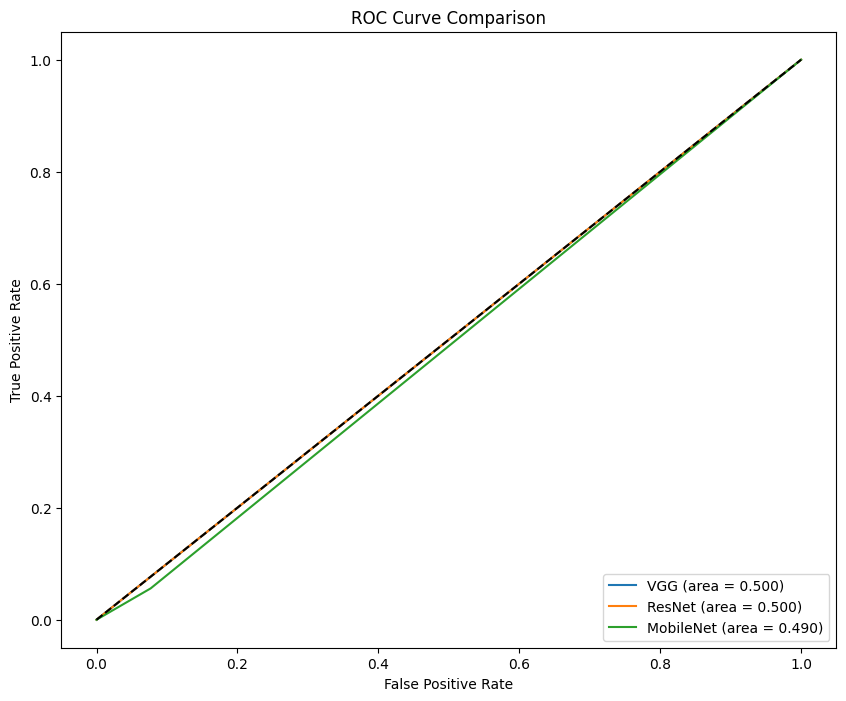

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_vgg, tpr_vgg, label='VGG (area = {:.3f})'.format(auc_vgg))
plt.plot(fpr_resnet, tpr_resnet, label='ResNet (area = {:.3f})'.format(auc_resnet))
plt.plot(fpr_mobilenet, tpr_mobilenet, label='MobileNet (area = {:.3f})'.format(auc_mobilenet))

plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()
